# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


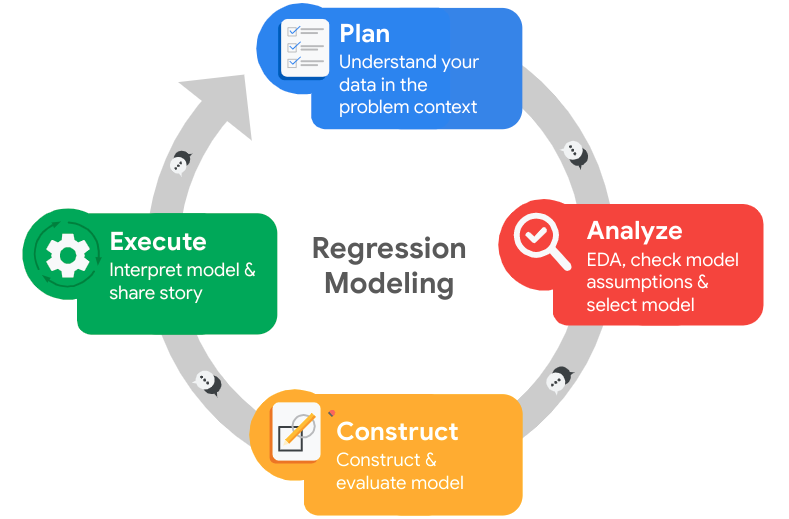

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project are the Saliford Motors executive team and HR team.
2. We are trying to increase employee satisfaction by predicting employee retention or depatrure using predictor variables from an employee survey.
3. Most of the variables are in interger or float format. The "Left" field is of interger type, I assume it will be binary with 0 = retained and 1= left the company. Alos there are two categorical variables, "department" and "salary" which we will need to encode.
4. My notes, previous completed workbooks, and previous lessions from this course.
5. My only hesitation is the reliability of the data. Some employees in apathy could have filled out the survey as fast as possible and not providing reliable and accurate information. I will check for these types of entries in cleaning and filter them out in applicable. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:

# Import packages for data manipulation
import numpy as np
import pandas as pd
import math

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"time_spend_company": "years_at_company", 
                          "Work_accident": "work_accident",
                          'Department' : 'department',
                          'average_montly_hours' : 'average_monthly_hours'
                         })


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep=False)].sort_values(['satisfaction_level','last_evaluation'])



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df0.shape)
print(df.shape)
print(14999-3008)
df.head()

(14999, 10)
(11991, 10)
11991


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Years at Company box plot')

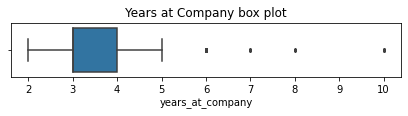

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(7,1))
sns.boxplot(x=df["years_at_company"], fliersize=2)
plt.title('Years at Company box plot')


In [12]:
# Determine the number of rows containing outliers
percentile25 = df['years_at_company'].quantile(.25)
percentile75 = df['years_at_company'].quantile(.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
outliers = df[(df['years_at_company'] < lower_limit) | (df['years_at_company'] > upper_limit)]
len(outliers)


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. I observed on the heatmap that 'satisfaction level' has the highest correlation with "left".
2. There are two groups of employees who left the company, those who worked considerably less than their peers with the same number of projects, and those who worked much more.
3. I plan to encode the categorical data to numeric and I could create a new variable "total_hours" that multiplies the "average_monthly_hours" value by 12 any by "years_at_company".
4. To understand the variables present in the dataset, to review the descriptive stats of the features, plot relationships between the variuables, and to identify issues with the data.
5. Notes, past labs, lessions from this course, pandas api reference website. (https://pandas.pydata.org/docs/reference/index.html)
6. I may have to remove the identified outliers for certain models.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed

print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

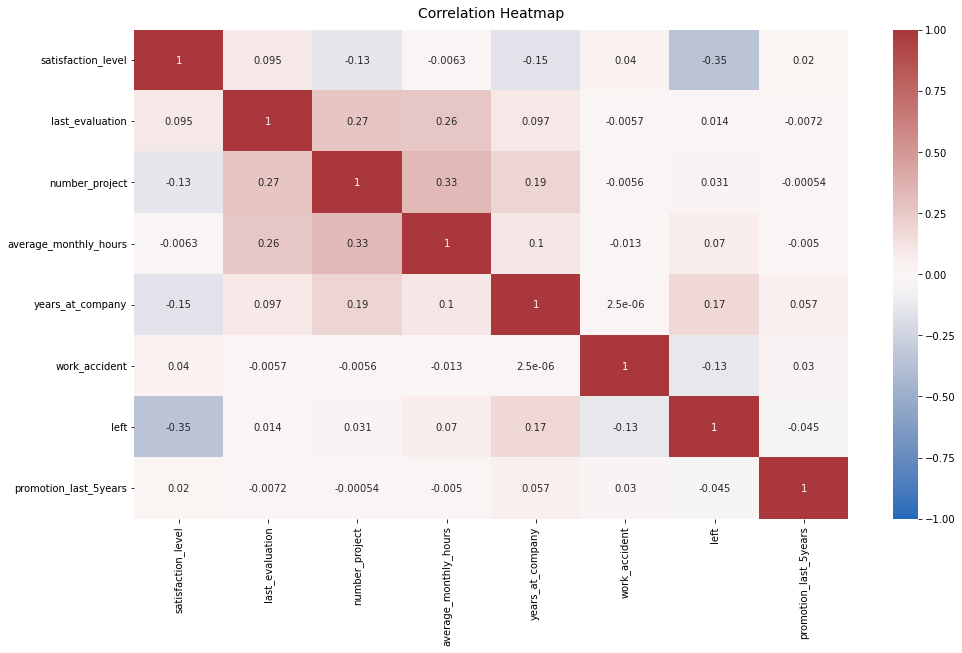

In [14]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

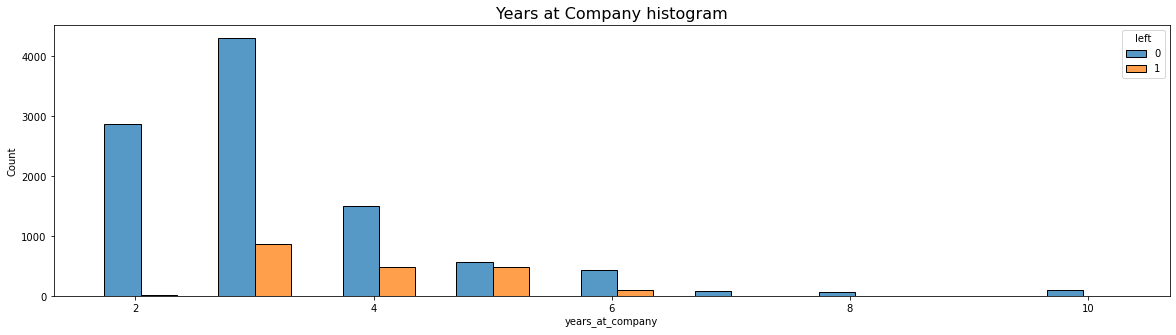

In [15]:
# Create a plot as needed
plt.figure(figsize=(20,5))
tenure_stay = df[df['left']==0]['years_at_company']
tenure_left = df[df['left']==1]['years_at_company']
sns.histplot(data=df, x='years_at_company', hue='left', multiple='dodge', shrink=7)
plt.title('Years at Company histogram', fontsize='16')

plt.show();

Text(0.5, 1.0, 'Salary histogram by tenure')

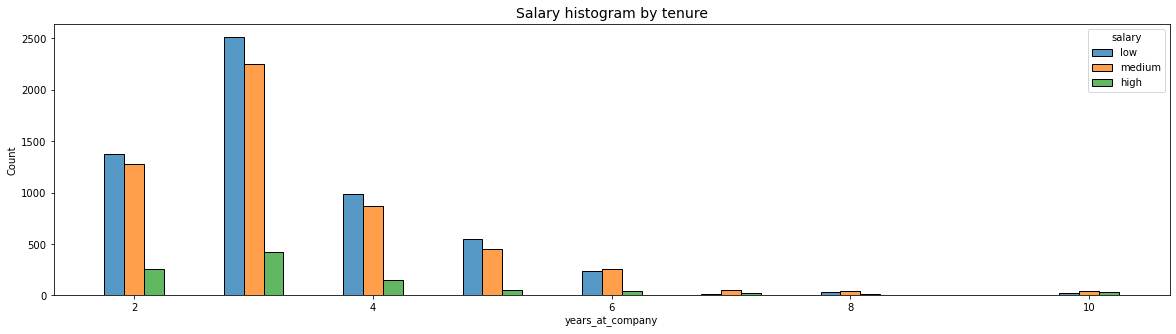

In [16]:
# Create a plot as needed
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='years_at_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,)

plt.title('Salary histogram by tenure', fontsize='14')


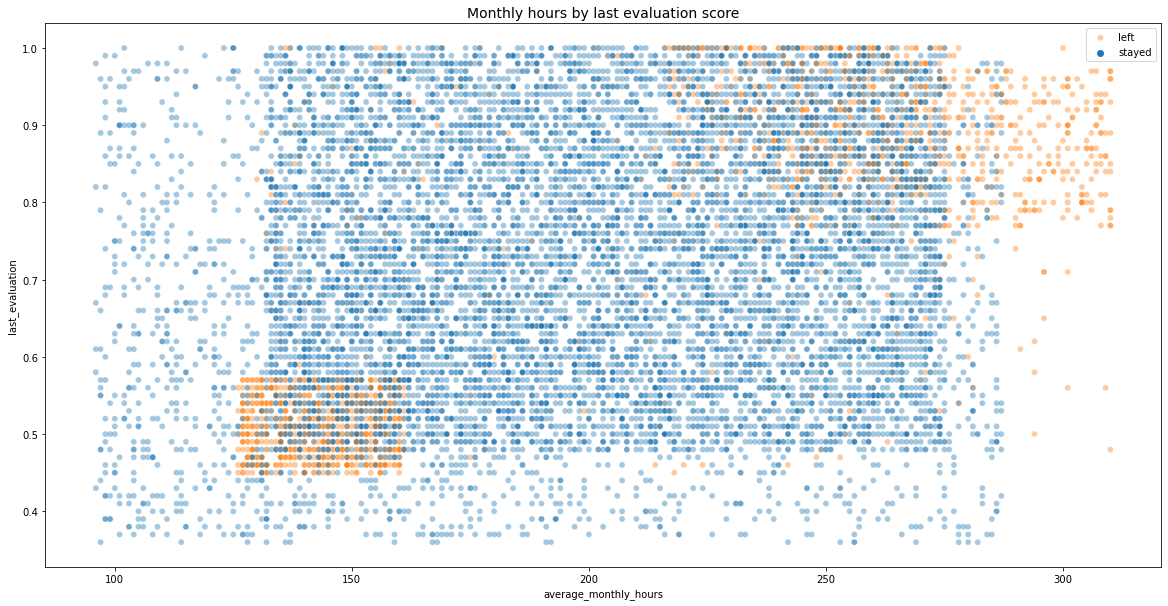

In [17]:
# Create a plot as needed
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


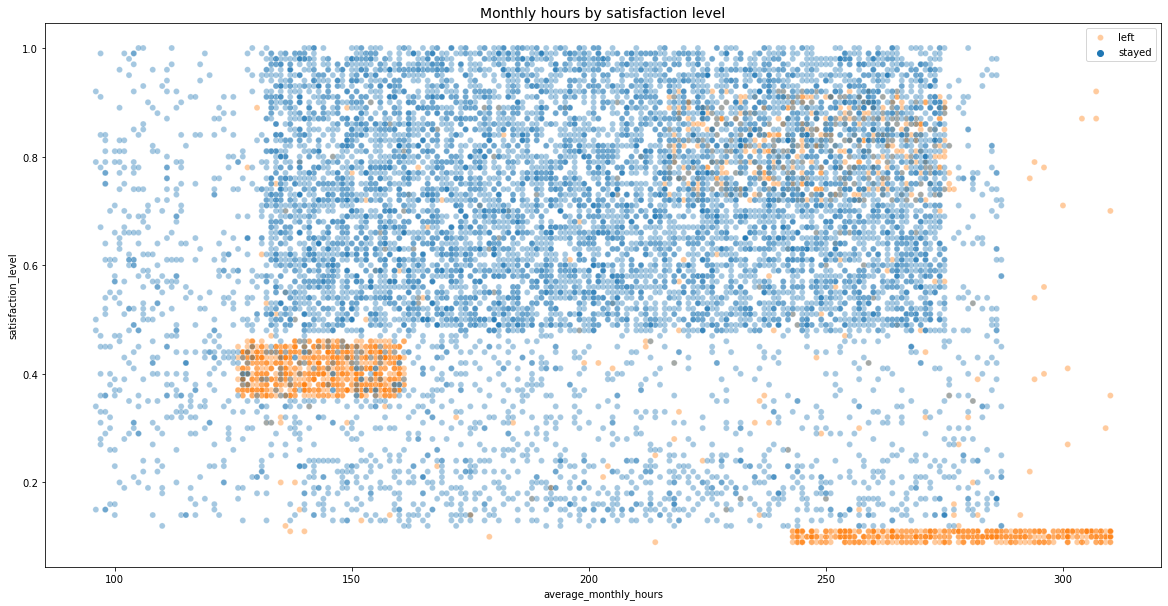

In [18]:
# Create a plot as needed
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');


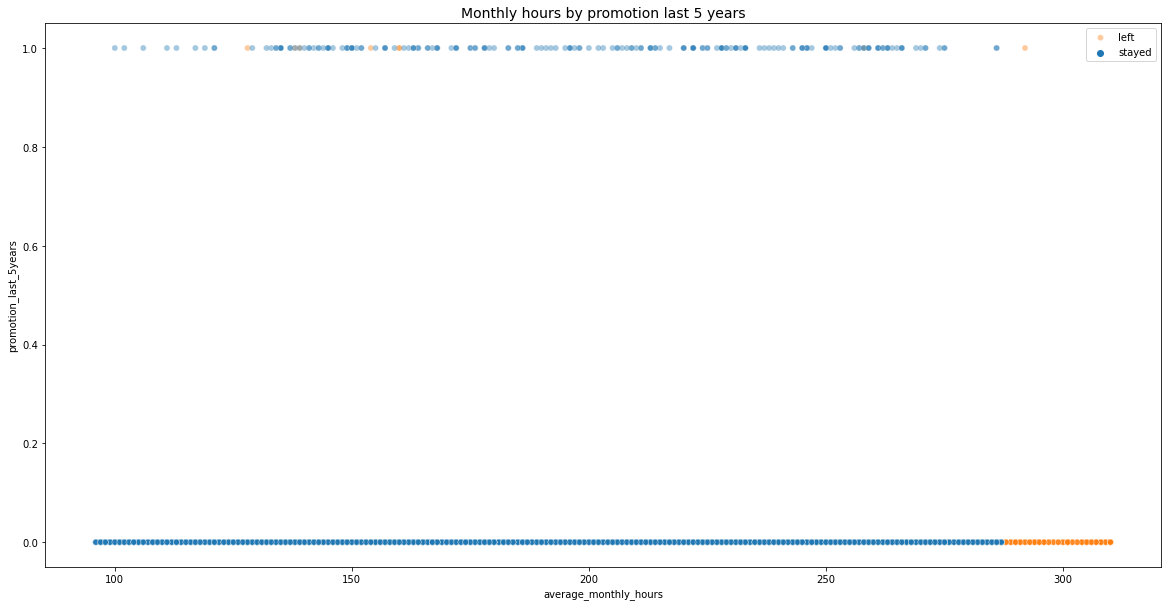

In [19]:
# Create a plot as needed
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');



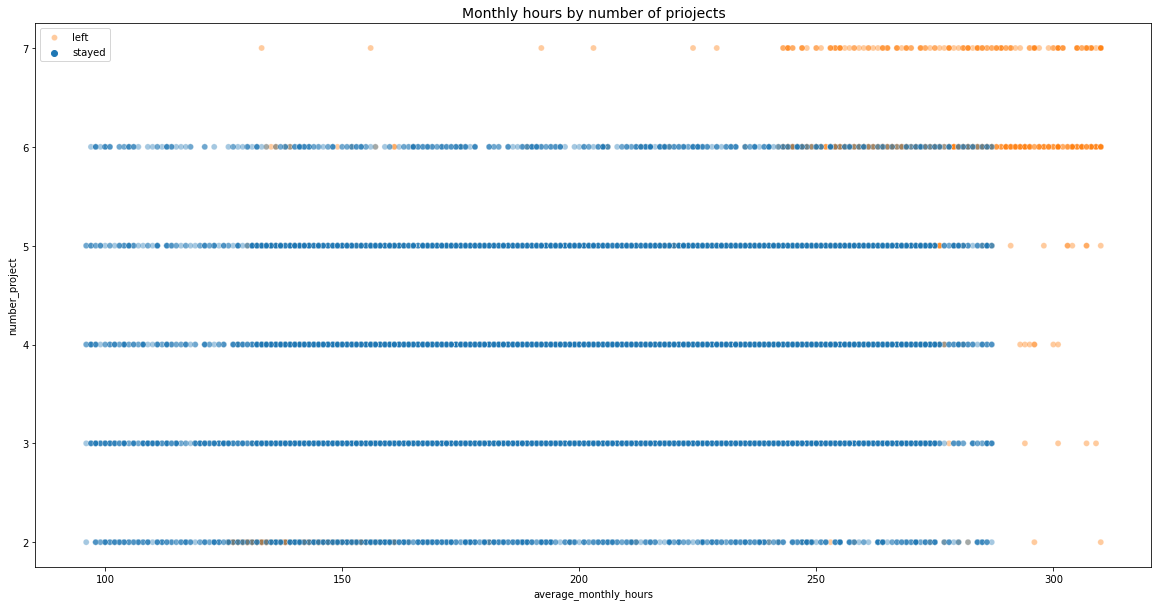

In [20]:
# Create a plot as needed
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='number_project', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by number of priojects', fontsize='14');



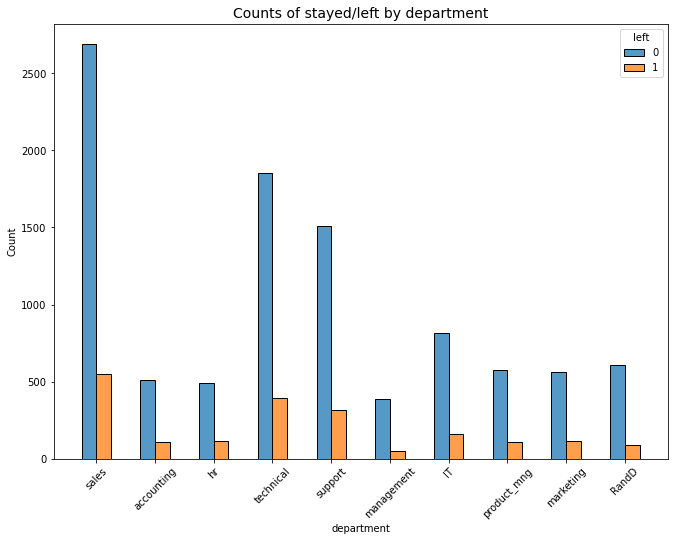

In [21]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

### Insights

1. According to the correlation heatmap, 'satisfaction level' has the highest correlation with "left". 
2. Most of the employees that leave the company have been working between 3 and 6 years.
3. Employees with high evaluation scores and high average hours worked have a higher chance of leaving as well as employees with lower than average hours and a lower evaluation score.
4. Employees that scored in satisfaction between .35-.45 and had an average number of hours worked have a high chance of leaving as well as employees that scored in satisfaction below 1.5 and worked over 225 hours monthly.
5. Employees that work on average over 275 hours per month and have not been promoted in the last five years have a high chance of leaving.
6. The majority of employees that left the company are working on 6-7 projects. There could be a correlation between number of projects and average monthly hours.
7. Emplyee retention by department seems rather uniformly distributed.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. The logit of the outcome variable and the X variable is really only linear with sartisfaction level.
2. I chose to use all the data available because I suspect every field has some correlation to an employee choosing to leave.
3. All assumptions are met, the logit assumption is not perfect but I will comtinue with the model for this exercise.
4. Overall the model scored well with an accuracy score of 82% and an F1 score of 80%.
5. I could try the model with different predictor variables to possible improve some of the scores. I can also try other machine learning madels.
6. I had to look at the documentation for precision_score from scikit learn's website. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
7. I do not have an ethical considerations at this stage.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The predictor variable 'left' is categorical.

### Identify the types of models most appropriate for this task.

Logistic Regression, decision tree, random forest, XGBoost. I am going to madel the data with logistic regression and random forest. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
##Encode Variables
df_enc = df.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
## Remove outliers identified earlier.
df_logr = df_enc[(df_enc['years_at_company']>= lower_limit) & (df_enc['years_at_company']<=upper_limit)]


##Assign Variables
X = df_logr.drop('left', axis=1)
y = df_logr['left']


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify = y)

# Fit logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

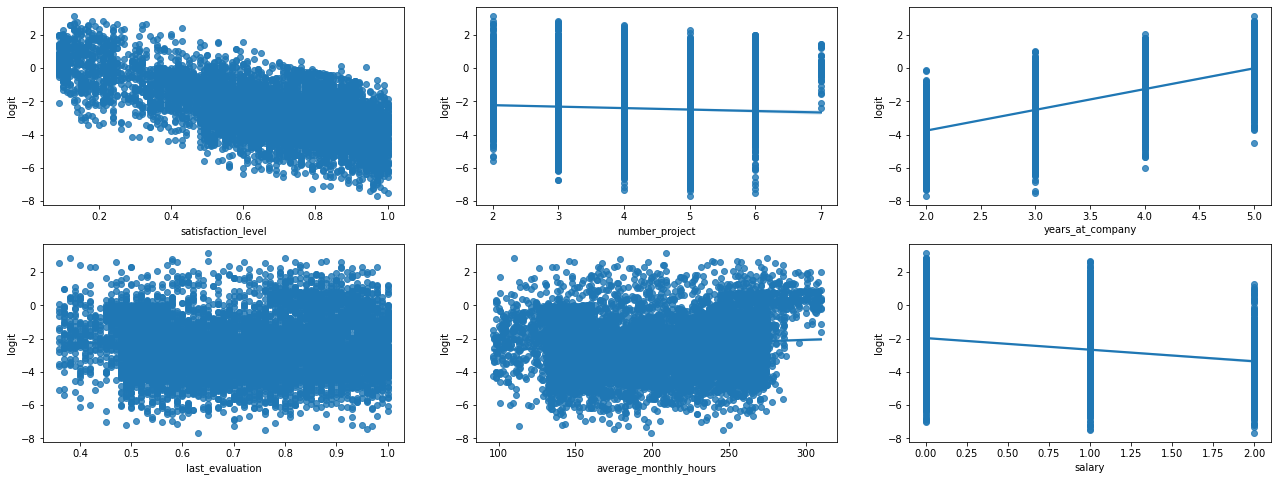

In [24]:
## Test Logit assumption (linear relationship between X and Logit of the outcome variable)
training_probabilities = log_clf.predict_proba(X_train)
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]
fig, ax = plt.subplots(2, 3, figsize = (22,8))
sns.regplot(x="satisfaction_level", y= "logit", data=logit_data, ax=ax[0,0])
sns.regplot(x="last_evaluation", y= "logit", data=logit_data, ax=ax[1,0])
sns.regplot(x="number_project", y= "logit", data=logit_data, ax=ax[0,1])
sns.regplot(x="average_monthly_hours", y= "logit", data=logit_data, ax=ax[1,1])
sns.regplot(x="years_at_company", y= "logit", data=logit_data, ax=ax[0,2])
sns.regplot(x="salary", y= "logit", data=logit_data, ax=ax[1,2])

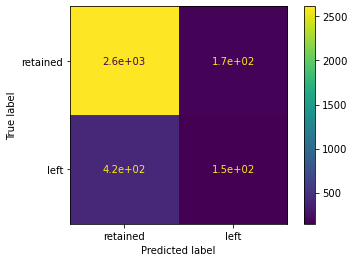

In [39]:
## Make predictions on the test data and then create a confusion matrix
y_pred_log = log_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['retained', 'left'])
disp.plot()

In [42]:
# Extract Accuracy, precision, recall, and f1 score
f1_log = f1_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
precision_log = precision_score(y_test, y_pred_log, average='weighted')
accuracy_log = accuracy_score(y_test, y_pred_log)

# Create table of results
table_log = pd.DataFrame({'model': 'Logistic Regression',
                      'precision': [precision_log],
                      'recall': [recall_log],
                      'F1': [f1_log],
                      'accuracy': [accuracy_log],
                      },
                     )

table_log

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.79395,0.823635,0.802711,0.823635


**Random Forest

In [33]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [34]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

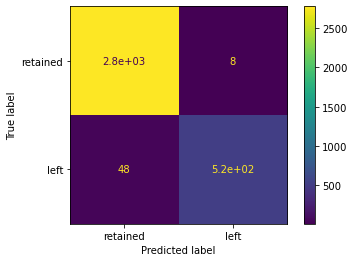

In [43]:
## Make predictions on the test data and then create a confusion matrix
y_pred_rf = rf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['retained', 'left'])
disp.plot()

In [44]:
# Extract Accuracy, precision, recall, and f1 score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create table of results
table_rf = pd.DataFrame({'model': 'Random Forest',
                      'precision': [precision_rf],
                      'recall': [recall_rf],
                      'F1': [f1_rf],
                      'accuracy': [accuracy_rf],
                      },
                     )

table_rf

,model,precision,recall,F1,accuracy
0,Random Forest,0.983309,0.983289,0.983041,0.983289


In [47]:
#Combine the tables
results = results = pd.concat([table_log, table_rf], axis=0, ignore_index=True)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.793950,0.823635,0.802711,0.823635
1,Random Forest,0.983309,0.983289,0.983041,0.983289


The random forest model preforms better than the logistic regression model. Next decide feature importance.

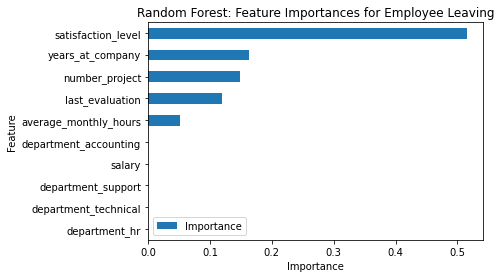

In [52]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Satisfaction level is the greatest predictor of employee retention by far followed by years at company and number of projects. 
2/3. Consider having conversations with employees that have a low satisfaction level, consider putting a cap on the number of projects an employee can work on,  consider promoting employees that have been around for X number of years. 
4. Perhaps with more feature engineering the model can be improved however the Random Forest model preformed so well I do no think the model can be improved much more.
5. When was the last employee satisfaction survey? Since satisfaction level is the greatest predictor of employee retention it may be prudent to conduct another empployee satisfaction survey.
6. Pandas.concat documentation for resetting the index. https://pandas.pydata.org/docs/reference/api/pandas.concat.html

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

Random Forest Machine Learning

The random forest model achieved precision of 98%, recall of 98%, f1-score of 98%, and accuracy of 98%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

-The Random Forest model preformed the best and can be used to predict employee retention.
-Satisfaction level is the greatest predictor of employee retention by far followed by years at company and number of projects.
-Consider another employee satisfaction survey and run the model with new satisfaction level data then consider having conversations with employees at risk of leaving the company according to the model.
-Consider putting a cap on the number of projects an employee can work on,  consider promoting employees that have been around for 5 years.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.